> Checked results and discussed with: **Rui Fang**

> Got help from **Chris** Office Hour

In [1]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

## Problem 1
### (a)

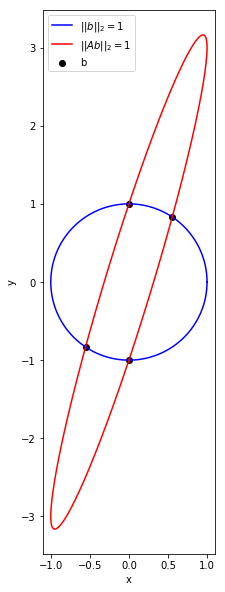

In [2]:
# plot ||b||_2 = 1, b = (x, y) = (cos(t), sin(t)), t in [0, 2*pi]
t_lin = np.linspace(0, 2*pi, 1000)
b_x = np.array([cos(tt) for tt in t_lin])
b_y = np.array([sin(tt) for tt in t_lin])
plt.plot(b_x, b_y, 'b-', label='$||b||_2=1$')

# plot ||Ab|| = 1, Ab = (sin(t), 3sin(t)-cos(t))
Ab_x = np.array([sin(tt) for tt in t_lin])
Ab_y = np.array([3*sin(tt)-cos(tt) for tt in t_lin])
plt.plot(Ab_x, Ab_y, 'r-', label='$||Ab||_2=1$')

# mark points b: (0, 1), (0, -1), (2/sqrt(13), 3/sqrt(13)), (-2/sqrt(13), -3/sqrt(13))
b_x = np.array([0, 0, 2/sqrt(13), -2/sqrt(13)])
b_y = np.array([1, -1, 3/sqrt(13), -3/sqrt(13)])
plt.scatter(x=b_x, y=b_y, marker='o', color='k', label='b')

plt.gcf().set_size_inches(6, 10)
plt.gca().set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### (b)

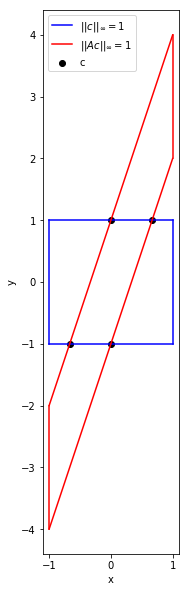

In [3]:
# plot ||c||_\\infty = 1, a square
x_range = np.linspace(-1, 1, 1000)
y_range = np.linspace(-1, 1, 1000)
plt.plot(np.ones(y_range.shape), y_range, 'b-', label='$||c||_\\infty=1$') # right side of the square
plt.plot(x_range, np.ones(x_range.shape), 'b-') # top side of the square
plt.plot(-np.ones(y_range.shape), y_range, 'b-') # left side of the square
plt.plot(x_range, -np.ones(x_range.shape), 'b-') # bottom side of the square

# plot ||Ac||_\\infty = 1, a polygon
Ac_right_y_range = y_range + 3
Ac_left_y_range = y_range - 3
Ac_top_y_range = np.array([3*xx+1 for xx in x_range])
Ac_bottom_y_range = np.array([3*xx-1 for xx in x_range])
plt.plot(np.ones(Ac_right_y_range.shape), Ac_right_y_range, 'r-', label='$||Ac||_\\infty=1$') # right side of the polygon
plt.plot(x_range, Ac_top_y_range, 'r-') # top side of the polygon
plt.plot(-np.ones(Ac_left_y_range.shape), Ac_left_y_range, 'r-') # left side of the polygon
plt.plot(x_range, Ac_bottom_y_range, 'r-') #bottom side of the polygon

# mark points c:
c_x = np.array([0, 2/3, -2/3, 0])
c_y = np.array([1, 1, -1, -1])
plt.scatter(x=c_x, y=c_y, marker='o', color='k', label='c')

plt.gcf().set_size_inches(6, 10)
plt.gca().set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### (c)

In [4]:
# (F1, F2)
def F_x_y(x, y):
    F1_x_y = x**4 + y**4 -1
    F2_x_y = (3*x-y)**4 + x**4 -1
    return np.array([
        [F1_x_y], 
        [F2_x_y]
    ])

# Jacob Matrix for (F1, F2)
def J_x_y(x, y):
    dF1_dx = 4 * x**3
    dF1_dy = 4 * y**3
    dF2_dx = 4 * x**3 + 12 * ((3*x-y)**3)
    dF2_dy = -4 * ((3*x-y)**3)
    return np.array([
        [dF1_dx, dF1_dy],
        [dF2_dx, dF2_dy]
    ])

# Newton roots finding
inits = [(2, 2), (-2, -2), (1, 10), (-1, -10)]
d_x = []
d_y = []
for x0, y0 in inits:
    x_y_matrix = np.array([
        [x0],
        [y0]
    ])
    for i in range(1000):
        x = x_y_matrix[0, 0]
        y = x_y_matrix[1, 0]

        F = F_x_y(x, y)
        J = J_x_y(x, y)
        delta_x_y = np.linalg.solve(J, -1*F)
        x_y_matrix = np.add(x_y_matrix, delta_x_y)
    
    d_x.append(np.around(x_y_matrix[0, 0], decimals = 4))
    d_y.append(np.around(x_y_matrix[1, 0], decimals = 4))

print('The x_values for the 4 intersection points are:\n', d_x)
print('The y_values for the 4 intersection points are:\n', d_y)

The x_values for the 4 intersection points are:
 [0.63729999999999998, -0.63729999999999998, -0.0, 0.0]
The y_values for the 4 intersection points are:
 [0.95589999999999997, -0.95589999999999997, 1.0, -1.0]


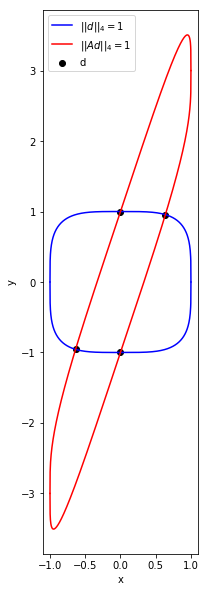

In [5]:
def f1_1(x):
    return pow(1-x**4, 1/4)

def f1_2(x):
    return -f1_1(x)

def f2_1(x):
    return 3*x + f1_1(x)

def f2_2(x):
    return 3*x - f1_1(x)

# plot ||d||_4 = 1
x_range = np.linspace(-1, 1, 1000)
y1_1 = np.array([f1_1(xx) for xx in x_range])
y1_2 = np.array([f1_2(xx) for xx in x_range])
plt.plot(x_range, y1_1, 'b-', label='$||d||_4=1$') # upper half
plt.plot(x_range, y1_2, 'b-') # lower half

# plot ||Ad||_4 = 1
y2_1 = np.array([f2_1(xx) for xx in x_range])
y2_2 = np.array([f2_2(xx) for xx in x_range])
plt.plot(x_range, y2_1, 'r-', label='$||Ad||_4=1$') # upper half
plt.plot(x_range, y2_2, 'r-') # lower half

# mark points d: 
plt.scatter(x=d_x, y=d_y, marker='o', color='k', label='d')

plt.gcf().set_size_inches(6, 10)
plt.gca().set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### (d)

Mathematical explanation is in the main writeup report.

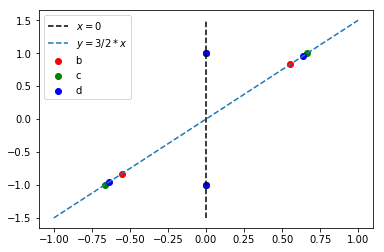

In [6]:
# Plot the lines and show that the family of points b, c, d lie on two lines
y_range = np.linspace(-1.5, 1.5, 300)
plt.plot(np.zeros(y_range.shape), y_range, 'k--', label='$x = 0$')
plt.plot(np.array([2/3*yy for yy in y_range]), y_range, '--', label= '$y =3/2*x $')

plt.scatter(x=b_x, y=b_y, marker='o', color='r', label='b')
plt.scatter(x=c_x, y=c_y, marker='o', color='g', label='c')
plt.scatter(x=d_x, y=d_y, marker='o', color='b', label='d')
plt.legend()

## Problem 2
### (a)

In [7]:
def fsolve(L, b):
    (n, n) = L.shape
    
    # Initalize the solution vector x (shape=(n,1)) with integer zeros
    x = np.zeros((n, 1), dtype=np.int8)
    for i in range(n):
        if L[i,i] == 0:
            raise Exception('L is Singular: L has 0 on its diagonal.')
        
        xi = b[i,0]
        for j in range(i):
            xi = (xi ^ (L[i,j]&x[j,0]))
        x[i,0] = xi/L[i,i]
    return x

### (b)

In [8]:
def rsolve(U, b):
    (n, n) = U.shape
    
    # Initalize the solution vector x (shape=(n,1)) with integer zeros
    x = np.zeros((n, 1), dtype=np.int8)
    for i in range(n-1, -1, -1):
        if U[i,i] == 0:
            raise Exception('U is Singular: U has 0 on its diagonal.')
        
        xi_back = b[i,0]
        for j in range(n-1-i):
            xi_back = (xi_back ^ (U[i,n-1-j]&x[n-1-j,0]))
        x[i,0] = xi_back/U[i,i]
    return x

### (c)

In [9]:
import warnings
def LU_factorize(A):
    (n, n) = A.shape
    U = np.array(A)
    L = np.eye(n).astype(np.int8)
    P = np.eye(n).astype(np.int8)
    for j in range(n-1):
        # select i that has the maximal magnitude on U[j:n,j]
        i = j + np.argmax(U[j:n,j])
        # exchange rows of U: U[j,j:n] <-> U[i,j:n]
        u_j = np.array(U[j,j:n])
        U[j,j:n] = U[i,j:n]
        U[i,j:n] = u_j
        # exchange rows of L: L[j,0:j] <-> L[i,0:j]
        l_j = np.array(L[j,0:j])
        L[j,0:j] = L[i,0:j]
        L[i,0:j] = l_j
        # exchange rows of P: P[j,:] <-> P[i,:]
        p_j = np.array(P[j,:])
        P[j,:] = P[i,:]
        P[i,:] = p_j
        
        # LU_factorization works for singular A by skipping the column where encountering U[j,j] = 0
        if U[j,j] == 0:
            warnings.warn("A is singular: Encountering zero on a diagonal.")
            continue
        for i in range(j+1, n):
            L[i,j] = U[i,j]/U[j,j]
            for k in range(j, n):
                U[i,k] = (U[i,k]^(L[i,j]&U[j,k]))
    return (U, L, P)                
        

In [10]:
# Binary multiplication routine provided by the HW files
def bin_mul(c,d):
    
    # Check that the dimensions of the matrices are compatible
    (m,n) = c.shape
    (nn,p) = d.shape
    if n != nn:
        print("Matrix size mismatch")
        sys.exit()

    # Initalize blank matrix of integer zeros
    e=np.zeros((m, p), dtype=np.int8)

    # Calculate each term, using "&" instead of "*" and "^" instead of "+"
    for i in range(m):
        for j in range(p):
            for k in range(n):
                e[i,j]=e[i,j]^(c[i,k]&d[k,j])
    return e

# Define the example L and U matrices
l=np.array([[1,0,0,0],[0,1,0,0],[1,1,1,0],[1,0,1,1]],dtype=np.int8)
u=np.array([[1,0,1,0],[0,1,1,1],[0,0,1,0],[0,0,0,1]],dtype=np.int8)

# Carry out binary matrix multiplication and print the result
a = bin_mul(l,u)
a

array([[1, 0, 1, 0],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 0, 0, 1]], dtype=int8)

In [11]:
# Validate LU_factorize() results by PA == LU
U_test, L_test, P_test = LU_factorize(a)
bin_mul(L_test, U_test) == bin_mul(P_test, a)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

### (d)

In [12]:
# load data
A_small = np.loadtxt('q2_small/a.txt').astype(np.int8)
b_small = np.loadtxt('q2_small/b.txt').astype(np.int8)
b_small = b_small.reshape((b_small.shape[0], 1))

A_large = np.loadtxt('q2_large/a.txt').astype(np.int8)
b_large = np.loadtxt('q2_large/b.txt').astype(np.int8)
b_large = b_large.reshape((b_large.shape[0], 1))

In [13]:
# LU_factorize data
U_small, L_small, P_small = LU_factorize(A_small)
U_large, L_large, P_large = LU_factorize(A_large)

In [14]:
bin_mul(P_small, A_small) == bin_mul(L_small, U_small)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         

In [15]:
# Solve Ax = b --- q2_small
Pb_small = np.dot(P_small, b_small)
y_small = fsolve(L_small, Pb_small)
x_small = rsolve(U_small, y_small)
print('q2_small: Solution for Ax=b \nx_small =', x_small[:,0].T)

q2_small: Solution for Ax=b 
x_small = [1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [16]:
# Validate x_small
(bin_mul(A_small, x_small) == b_small).T

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]], dtype=bool)

In [17]:
# Solve Ax = b --- q2_small
Pb_large = np.dot(P_large, b_large)
y_large = fsolve(L_large, Pb_large)
x_large = rsolve(U_large, y_large)
print('q2_large: Solution for Ax=b \nx_large =', x_large[:,0].T)

q2_large: Solution for Ax=b 
x_large = [0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]


In [18]:
# Validate x_large
(bin_mul(A_large, x_large) == b_large).T

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]], dtype=bool)

## Problem 3
### (a)

In [19]:
# Get the 1D index of the 2D board
def get_1d_index(i, j, n=7):
    return i*n+j

# Get the changes in the lights_vector (b) due to the press of any press at M[i,j]
def get_delta_b(i, j, m=7, n=7):
    b = np.zeros((m*n, 1), dtype=np.int8)
    b[get_1d_index(i,j,n)] = 1 # center
    if i-1 >= 0:
        b[get_1d_index(i-1,j,n)] = 1 # upper
    if i+1 < m:
        b[get_1d_index(i+1,j,n)] = 1 # bottom
    if j-1 >= 0:
        b[get_1d_index(i,j-1,n)] = 1 # left
    if j+1 < n:
        b[get_1d_index(i,j+1,n)] = 1 # right
    return b

# Construct A by calculating A's column vectors 
def construct_A_light(m, n):
    mn = m*n
    A_light_game = np.zeros((mn, mn), dtype=np.int8)
    for a in range(m):
        for b in range(n):
            b_delta = get_delta_b(a, b, m, n)
            A_light_game[:,get_1d_index(a,b,n)] = b_delta.reshape((b_delta.shape[0],))
    return A_light_game

A_light_game = construct_A_light(7, 7)

### (b)

In [20]:
(U_lg, L_lg, P_lg) = LU_factorize(A_light_game)
size = 7*7

# Solve presses for case 1: center lights on
b1 = np.zeros((size, 1), dtype=np.int8)
lights_pos_1 = [
    (0,3), 
    (1,2), (1,3), (1,4), 
    (2,1), (2,2), (2,3), (2,4), (2,5), 
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), 
    (4,1), (4,2), (4,3), (4,4), (4,5),
    (5,2), (5,3), (5,4), 
    (6,3)
]
for (a,b) in lights_pos_1:
    b1[get_1d_index(a,b)] = 1
Pb1 = np.dot(P_lg, b1)
y_b1 = fsolve(L_lg, Pb1)
x_b1 = rsolve(U_lg, y_b1)

# Solve presses for case 2: center square
b2 = np.zeros((size, 1), dtype=np.int8)
lights_pos_2 = [
    (1,1), (1,2), (1,3), (1,4), (1,5),
    (2,1), (2,2), (2,3), (2,4), (2,5), 
    (3,1), (3,2), (3,3), (3,4), (3,5), 
    (4,1), (4,2), (4,3), (4,4), (4,5),
    (5,1), (5,2), (5,3), (5,4), (5,5)
]
for (a,b) in lights_pos_2:
    b2[get_1d_index(a,b)] = 1
Pb2 = np.dot(P_lg, b2)
y_b2 = fsolve(L_lg, Pb2)
x_b2 = rsolve(U_lg, y_b2)

# Solve presses for case3: one center light on
b3 = np.zeros((size, 1), dtype=np.int8)
lights_pos_3 = [
    (3,3)
]
for (a,b) in lights_pos_3:
    b3[get_1d_index(a,b)] = 1
Pb3 = np.dot(P_lg, b3)
y_b3 = fsolve(L_lg, Pb3)
x_b3 = rsolve(U_lg, y_b3)

# Solve presses for case4: the left bottom light on
b4 = np.zeros((size, 1), dtype=np.int8)
lights_pos_4 = [
    (6,0)
]
for (a,b) in lights_pos_4:
    b4[get_1d_index(a,b)] = 1
Pb4 = np.dot(P_lg, b4)
y_b4 = fsolve(L_lg, Pb4)
x_b4 = rsolve(U_lg, y_b4)

# Solve presses for case5: light (4,0) on
b5 = np.zeros((size, 1), dtype=np.int8)
lights_pos_5 = [
    (4,0)
]
for (a,b) in lights_pos_5:
    b5[get_1d_index(a,b)] = 1
Pb5 = np.dot(P_lg, b5)
y_b5 = fsolve(L_lg, Pb5)
x_b5 = rsolve(U_lg, y_b5)

# Solve presses for my own pattern
b6 = np.zeros((size, 1), dtype=np.int8)
lights_pos_6 = [
    (0,3),
    (1,2), (1,3), (1,4),
    (2,1), (2,3), (2,5),
    (3,0), (3,3), (3,6),
    (4,3),
    (5,3),
    (6,3)
]
for (a,b) in lights_pos_6:
    b6[get_1d_index(a,b)] = 1
Pb6 = np.dot(P_lg, b6)
y_b6 = fsolve(L_lg, Pb6)
x_b6 = rsolve(U_lg, y_b6)


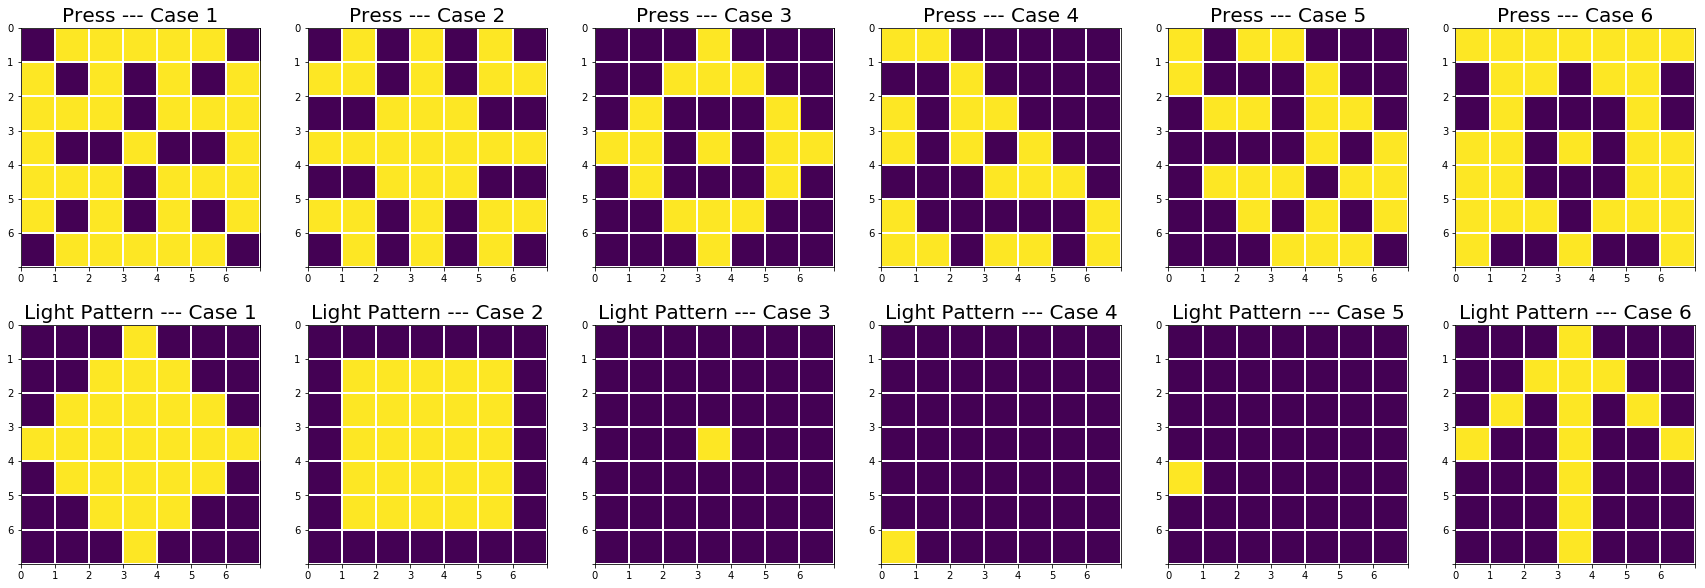

In [21]:
width = 7

# Presses and light_patterns case 1-5
presses_1 = x_b1.reshape(width, width)
lights_1 = bin_mul(A_light_game, x_b1).reshape(width, width)

presses_2 = x_b2.reshape(width, width)
lights_2 = bin_mul(A_light_game, x_b2).reshape(width, width)

presses_3 = x_b3.reshape(width, width)
lights_3 = bin_mul(A_light_game, x_b3).reshape(width, width)

presses_4 = x_b4.reshape(width, width)
lights_4 = bin_mul(A_light_game, x_b4).reshape(width, width)

presses_5 = x_b5.reshape(width, width)
lights_5 = bin_mul(A_light_game, x_b5).reshape(width, width)

# Presses and light_patterns of my own
presses_6 = x_b6.reshape(width, width)
lights_6 = bin_mul(A_light_game, x_b6).reshape(width, width)

presses = list([presses_1, presses_2, presses_3, presses_4, presses_5, presses_6])
light_patterns = list([lights_1, lights_2, lights_3, lights_4, lights_5, lights_6])

# Plot each set of presses and light_patterns
fig, axes = plt.subplots(2, 6, figsize=(30, 10))

for j in range(6):
    axes[0, j].imshow(presses[j])
    axes[0, j].set_title('Press --- Case '+str(j+1), fontsize=20)
    axes[0, j].set_xticks(np.arange(-.5, 7, 1))
    axes[0, j].set_yticks(np.arange(-.5, 7, 1))
    axes[0, j].set_xticklabels(np.arange(0, 7, 1))
    axes[0, j].set_yticklabels(np.arange(0, 7, 1))
    axes[0, j].grid(color='w', linestyle='-', linewidth=2)
    
    axes[1, j].imshow(light_patterns[j])
    axes[1, j].set_title('Light Pattern --- Case '+str(j+1), fontsize=20)
    axes[1, j].set_xticks(np.arange(-.5, 7, 1))
    axes[1, j].set_yticks(np.arange(-.5, 7, 1))
    axes[1, j].set_xticklabels(np.arange(0, 7, 1))
    axes[1, j].set_yticklabels(np.arange(0, 7, 1))
    axes[1, j].grid(color='w', linestyle='-', linewidth=2)
    

### (c)

In [22]:
# Construct f(m,n) for m,n in (1,2,3,4,5,6,7,8,9)
f = -1*np.zeros((10, 10), dtype=np.int8)
for m in range(1, 10):
    for n in range(1, 10):
        A = construct_A_light(m, n)
        U, L, P = LU_factorize(A)
        rank_A = np.count_nonzero(np.tril(np.triu(U)))
        f[m,n] = m*n - rank_A
f_mn = f[1:, 1:] # Cutting out the padding
f_mn

/Users/jasminetong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: A is singular: Encountering zero on a diagonal.


array([[0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 2, 0, 1, 0, 2, 0, 1],
       [0, 2, 0, 0, 3, 0, 0, 2, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 4],
       [1, 1, 3, 0, 2, 0, 4, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 6, 0],
       [0, 2, 0, 0, 4, 0, 0, 2, 0],
       [1, 0, 2, 0, 1, 6, 2, 0, 1],
       [0, 1, 0, 4, 1, 0, 0, 1, 8]], dtype=int8)

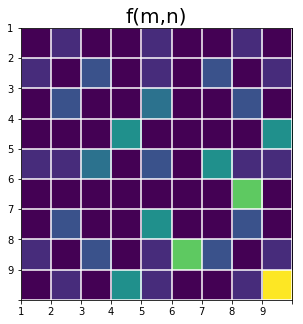

In [23]:
# Plot f(m,n) as image
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(f_mn/np.max(f))
axes.set_title('f(m,n)', fontsize=20)
axes.set_xticks(np.arange(-.5, 9, 1))
axes.set_yticks(np.arange(-.5, 9, 1))
axes.set_xticklabels(np.arange(1, 10, 1))
axes.set_yticklabels(np.arange(1, 10, 1))
axes.grid(color='w', linestyle='-', linewidth=1.5)

## Problem 4
### (a)

In [24]:
def generate_g(n):
    G_n = -1*np.tril(np.ones((n, n))) + 2*np.eye(n) 
    G_n[:,-1] = 1
    return G_n

generate_g(6)

array([[ 1.,  0.,  0.,  0.,  0.,  1.],
       [-1.,  1.,  0.,  0.,  0.,  1.],
       [-1., -1.,  1.,  0.,  0.,  1.],
       [-1., -1., -1.,  1.,  0.,  1.],
       [-1., -1., -1., -1.,  1.,  1.],
       [-1., -1., -1., -1., -1.,  1.]])

### (b)

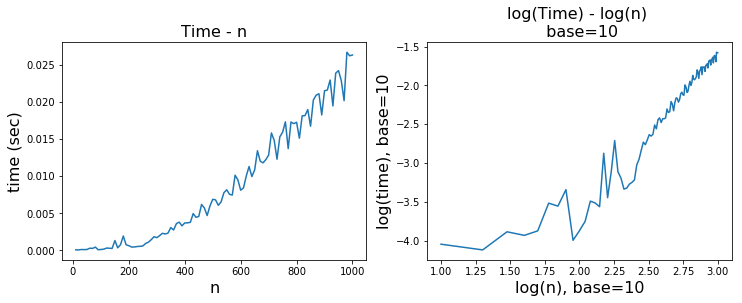

In [25]:
import time
# Compute an array of n
ns = range(10, 1001, 10) # original scale
log_ns = np.array([log10(nn) for nn in ns]) # log scale

# Computer an array of times
times = []
for n in ns:
    t0 = time.time()
    generate_g(n)
    t1 = time.time()
    dt = t1-t0
    times.append(dt) # original scale
log_times = np.array([log10(t) for t in times]) # log scale
    
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(ns, times)
axes[0].set_title('Time - n',fontsize=16)
axes[0].set_xlabel('n',fontsize=16)
axes[0].set_ylabel('time (sec)',fontsize=16)

axes[1].plot(log_ns, log_times)
axes[1].set_title('log(Time) - log(n) \n base=10',fontsize=16)
axes[1].set_xlabel('log(n), base=10', fontsize=16)
axes[1].set_ylabel('log(time), base=10', fontsize=16)


In [26]:
# Fit the original time(n) using the degree = 2 polyfit
beta = 2 # Value of beta is determined by calculating the slope in the log10 plot
poly_coeffs = np.polyfit(ns, times, 2)

# Get the coefficients for the polynomial fitting
alpha = poly_coeffs[0]
c1 = poly_coeffs[1]
c2 = poly_coeffs[2]
print('alpha = ', alpha)

# Construct the polynomial fitting function
poly_fit = np.array([alpha*(nn**beta)+c1*(nn)+c2 for nn in ns])


alpha =  2.64954261615e-08


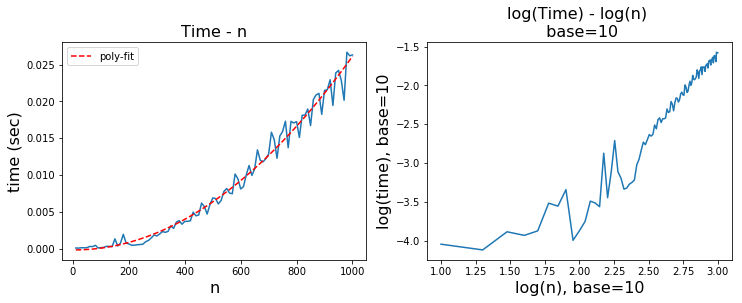

In [27]:
# Plot the poly-fit together with the original data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(ns, times)
axes[0].plot(ns, poly_fit, 'r--', label='poly-fit')
axes[0].set_title('Time - n',fontsize=16)
axes[0].set_xlabel('n',fontsize=16)
axes[0].set_ylabel('time (sec)',fontsize=16)
axes[0].legend()

axes[1].plot(log_ns, log_times)
axes[1].set_title('log(Time) - log(n) \n base=10',fontsize=16)
axes[1].set_xlabel('log(n), base=10', fontsize=16)
axes[1].set_ylabel('log(time), base=10', fontsize=16)


### (c)

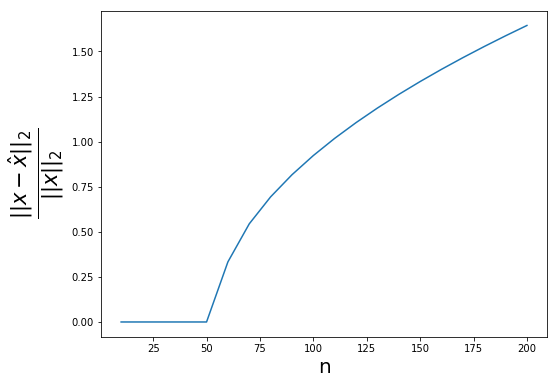

In [28]:
ns = range(10, 201, 10)

# Calculate the ||x-x_hat||_2
rel_err_2norm = []
for n in ns:
    x = np.ones(n)
    G_n = generate_g(n)
    b = np.dot(G_n, x)
    x_hat = np.linalg.solve(G_n, b)
    rel_err_2norm.append(np.linalg.norm(x_hat-x) / np.linalg.norm(x_hat))

plt.figure(figsize=(8,6))
plt.plot(ns, rel_err_2norm)
plt.xlabel('n', fontsize=20)
plt.ylabel('$\\frac{||x-\hat{x}||_2}{||x||_2}$', fontsize=30)
plt.show()

In [29]:
import scipy.linalg
N = 4
x_g = np.ones(N)
G_g = generate_g(N)
(P_g, L_g, U_g) = scipy.linalg.lu(G_g)
b_g = np.dot(G_g, x_g)
x_g_hat = np.linalg.solve(G_g, b_g)
x_g_hat

array([ 1.,  1.,  1.,  1.])

In [30]:
L_g

array([[ 1.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.],
       [-1., -1., -1.,  1.]])

In [31]:
U_g

array([[ 1.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  2.],
       [ 0.,  0.,  1.,  4.],
       [ 0.,  0.,  0.,  8.]])

In [32]:
G_g

array([[ 1.,  0.,  0.,  1.],
       [-1.,  1.,  0.,  1.],
       [-1., -1.,  1.,  1.],
       [-1., -1., -1.,  1.]])

### (d)

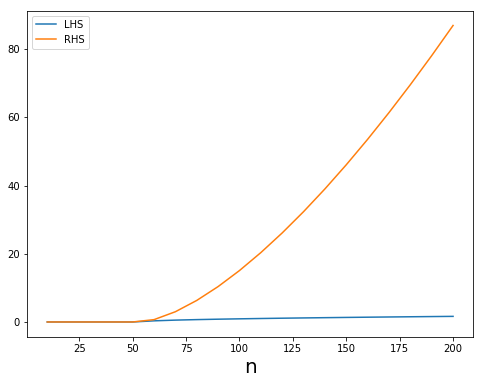

In [33]:
ns = range(10, 201, 10)

# Calculate the ||x-x_hat||_2
LHS = []
RHS = []
for n in ns:
    x = np.ones(n)
    G_n = generate_g(n)
    b = np.dot(G_n, x)
    x_hat = np.linalg.solve(G_n, b)
    b_hat = np.dot(G_n, x_hat)
    
    LHS.append(np.linalg.norm(x-x_hat) / np.linalg.norm(x_hat))
    RHS.append((np.linalg.cond(G_n)*np.linalg.norm(b-b_hat)) / (np.linalg.norm(G_n)*np.linalg.norm(x_hat)))

plt.figure(figsize=(8,6))
plt.plot(ns, LHS, label='LHS')
plt.plot(ns, RHS, label='RHS')
plt.xlabel('n', fontsize=20)
plt.legend()
plt.show()

## Problem 6

**Note:** I used the smallest set of images: 356 x 280

### (a)

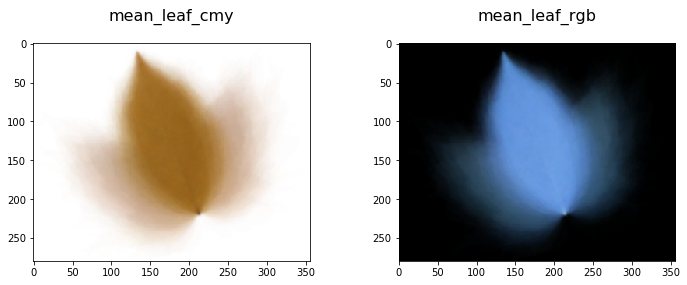

In [34]:
from skimage import io
from os import listdir

# List the filenames of all leaves
path = 'leaves/main/'
file_names = [f for f in listdir(path)]
L = len(file_names) # 143

# read in all leaves and compute their mean
(M, N) = (356, 280)
mean_leaf_rgb = np.zeros([N, M, 3])
for f_name in file_names:
    leaf = 1 - io.imread(path+f_name)/255
    mean_leaf_rgb += leaf

mean_leaf_cmy = 1 - mean_leaf_rgb/L
# plt.imshow(mean_leaf_cmy)

mean_leaf_rgb = mean_leaf_rgb/L
# plt.imshow(mean_leaf_rgb)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(mean_leaf_cmy)
axes[0].set_title('mean_leaf_cmy\n', fontsize=16)

axes[1].imshow(mean_leaf_rgb)
axes[1].set_title('mean_leaf_rgb\n', fontsize=16)


### (b)

In [35]:
# Stretch the mean leaf into a long (3*M*N, 1) array
mean_r = mean_leaf_rgb[:,:,0].reshape(M*N)
mean_g = mean_leaf_rgb[:,:,1].reshape(M*N)
mean_b = mean_leaf_rgb[:,:,2].reshape(M*N)
mean_leaf_rgb_long = np.concatenate((mean_r,mean_g,mean_b), axis=0)

# Assemble the matrix A_leaf
A_leaf = np.zeros([3*M*N, L])
j = 0
for f_name in file_names:
    leaf = 1 - io.imread(path+f_name).astype(np.float64)/255
    
    # Stretch this leaf into a long (3*M*N, 1) array
    r = leaf[:,:,0].reshape(M*N)
    g = leaf[:,:,1].reshape(M*N)
    b = leaf[:,:,2].reshape(M*N)
    leaf_long = np.concatenate((r,g,b), axis=0)
    
    # Deduct the 1d mean leaf from this leaf and append this leaf to A's j-th column
    A_leaf[:,j] = leaf_long - mean_leaf_rgb_long
    j += 1

# Do reduced SVD of A_leaf
U_leaf, s_leaf, V_leaf = np.linalg.svd(A_leaf, full_matrices=False)

#print(A_leaf.shape, U_leaf.shape, s_leaf.shape, V_leaf.shape)

In [36]:
# For each column in U, find c[j] = min{U[:,j]} and d[j] = max{U[:,j]}
col = 4
c = []
d = []
for j in range(col):
    c.append(np.min(U_leaf[:,j]))
    d.append(np.max(U_leaf[:,j]))

uP = np.zeros((3*M*N, col))
uN = np.zeros((3*M*N, col))

# Separate positive and negative components of each column of U into uP and uN
for j in range(col):
    for i in range(3*M*N):
        uP[i,j] = max(0, U_leaf[i,j]/d[j])
        uN[i,j] = max(0, U_leaf[i,j]/c[j])


#print(uP.shape, uN.shape)

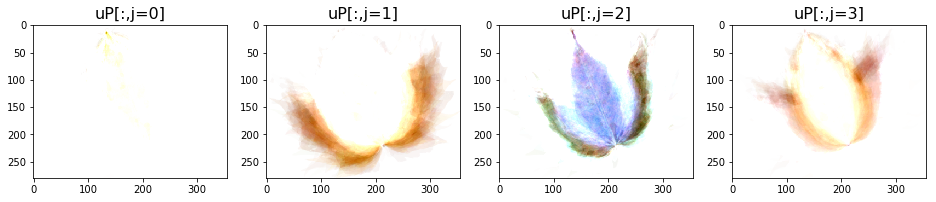

In [37]:
# uP[:,j=0]
uP_0_r = uP[:,0][0:M*N].reshape((N,M))
uP_0_g = uP[:,0][M*N:2*M*N].reshape((N,M))
uP_0_b = uP[:,0][2*M*N:3*M*N].reshape((N,M))
uP_0_rgb = np.zeros([N,M,3])
uP_0_rgb[:,:,0] = uP_0_r
uP_0_rgb[:,:,1] = uP_0_g
uP_0_rgb[:,:,2] = uP_0_b
uP_0_cmy = 1 - uP_0_rgb

# uP[:,j=1]
uP_1_r = uP[:,1][0:M*N].reshape((N,M))
uP_1_g = uP[:,1][M*N:2*M*N].reshape((N,M))
uP_1_b = uP[:,1][2*M*N:3*M*N].reshape((N,M))
uP_1_rgb = np.zeros([N,M,3])
uP_1_rgb[:,:,0] = uP_1_r
uP_1_rgb[:,:,1] = uP_1_g
uP_1_rgb[:,:,2] = uP_1_b
uP_1_cmy = 1 - uP_1_rgb

# uP[:,j=2]
uP_2_r = uP[:,2][0:M*N].reshape((N,M))
uP_2_g = uP[:,2][M*N:2*M*N].reshape((N,M))
uP_2_b = uP[:,2][2*M*N:3*M*N].reshape((N,M))
uP_2_rgb = np.zeros([N,M,3])
uP_2_rgb[:,:,0] = uP_2_r
uP_2_rgb[:,:,1] = uP_2_g
uP_2_rgb[:,:,2] = uP_2_b
uP_2_cmy = 1 - uP_2_rgb

# uP[:,j=2]
uP_3_r = uP[:,3][0:M*N].reshape((N,M))
uP_3_g = uP[:,3][M*N:2*M*N].reshape((N,M))
uP_3_b = uP[:,3][2*M*N:3*M*N].reshape((N,M))
uP_3_rgb = np.zeros([N,M,3])
uP_3_rgb[:,:,0] = uP_3_r
uP_3_rgb[:,:,1] = uP_3_g
uP_3_rgb[:,:,2] = uP_3_b
uP_3_cmy = 1 - uP_3_rgb

fig, axes = plt.subplots(1, 4, figsize=(16, 6))

axes[0].imshow(uP_0_cmy)
axes[0].set_title('uP[:,j=0]', fontsize=16)

axes[1].imshow(uP_1_cmy)
axes[1].set_title('uP[:,j=1]', fontsize=16)

axes[2].imshow(uP_2_cmy)
axes[2].set_title('uP[:,j=2]', fontsize=16)

axes[3].imshow(uP_3_cmy)
axes[3].set_title('uP[:,j=3]', fontsize=16)


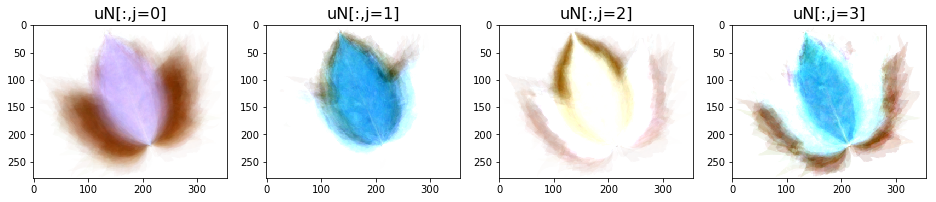

In [38]:
# uN[:,j=0]
uN_0_r = uN[:,0][0:M*N].reshape((N,M))
uN_0_g = uN[:,0][M*N:2*M*N].reshape((N,M))
uN_0_b = uN[:,0][2*M*N:3*M*N].reshape((N,M))
uN_0_rgb = np.zeros([N,M,3])
uN_0_rgb[:,:,0] = uN_0_r
uN_0_rgb[:,:,1] = uN_0_g
uN_0_rgb[:,:,2] = uN_0_b
uN_0_cmy = 1 - uN_0_rgb

# uN[:,j=1]
uN_1_r = uN[:,1][0:M*N].reshape((N,M))
uN_1_g = uN[:,1][M*N:2*M*N].reshape((N,M))
uN_1_b = uN[:,1][2*M*N:3*M*N].reshape((N,M))
uN_1_rgb = np.zeros([N,M,3])
uN_1_rgb[:,:,0] = uN_1_r
uN_1_rgb[:,:,1] = uN_1_g
uN_1_rgb[:,:,2] = uN_1_b
uN_1_cmy = 1 - uN_1_rgb

# uN[:,j=2]
uN_2_r = uN[:,2][0:M*N].reshape((N,M))
uN_2_g = uN[:,2][M*N:2*M*N].reshape((N,M))
uN_2_b = uN[:,2][2*M*N:3*M*N].reshape((N,M))
uN_2_rgb = np.zeros([N,M,3])
uN_2_rgb[:,:,0] = uN_2_r
uN_2_rgb[:,:,1] = uN_2_g
uN_2_rgb[:,:,2] = uN_2_b
uN_2_cmy = 1 - uN_2_rgb

# uN[:,j=3]
uN_3_r = uN[:,3][0:M*N].reshape((N,M))
uN_3_g = uN[:,3][M*N:2*M*N].reshape((N,M))
uN_3_b = uN[:,3][2*M*N:3*M*N].reshape((N,M))
uN_3_rgb = np.zeros([N,M,3])
uN_3_rgb[:,:,0] = uN_3_r
uN_3_rgb[:,:,1] = uN_3_g
uN_3_rgb[:,:,2] = uN_3_b
uN_3_cmy = 1 - uN_3_rgb

fig, axes = plt.subplots(1, 4, figsize=(16, 6))

axes[0].imshow(uN_0_cmy)
axes[0].set_title('uN[:,j=0]', fontsize=16)

axes[1].imshow(uN_1_cmy)
axes[1].set_title('uN[:,j=1]', fontsize=16)

axes[2].imshow(uN_2_cmy)
axes[2].set_title('uN[:,j=2]', fontsize=16)

axes[3].imshow(uN_3_cmy)
axes[3].set_title('uN[:,j=3]', fontsize=16)


### (c)

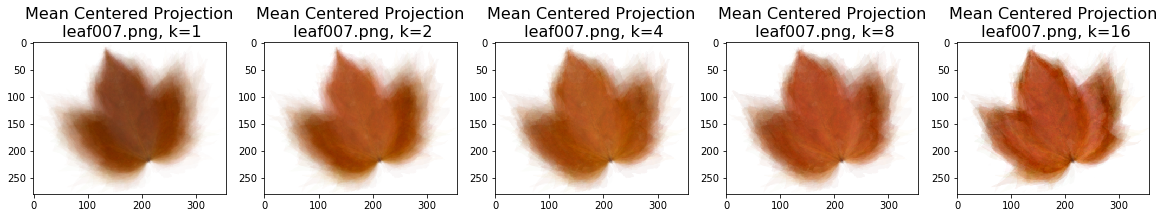

In [39]:
def projection_left_K(k, filename):
    T = 1 - io.imread(filename)/255

    # Stretch this leaf into a long (3*M*N, 1) 1d array
    T_r = T[:,:,0].reshape(M*N)
    T_g = T[:,:,1].reshape(M*N)
    T_b = T[:,:,2].reshape(M*N)
    T_rgb_long = np.concatenate((T_r,T_g,T_b), axis=0)
    
    # Build the projection from the mean_leaf
    P = np.array(mean_leaf_rgb_long)
    T_centered = T_rgb_long - mean_leaf_rgb_long
    for j in range(k):
        P += np.dot(U_leaf[:,j].T, T_centered) * U_leaf[:,j]
    
    # Transform the (3*M*N, 1) 1d leaf projection into an image
    P_r = P[0:M*N].reshape((N,M))
    P_g = P[M*N:2*M*N].reshape((N,M))
    P_b = P[2*M*N:3*M*N].reshape((N,M))
    P_rgb = np.zeros([N,M,3])
    P_rgb[:,:,0] = P_r
    P_rgb[:,:,1] = P_g
    P_rgb[:,:,2] = P_b
    P_cmy = 1 - P_rgb
    
    # Return the projection in both RGB and CMY color mixing
    return (P_rgb, P_cmy)

# For k = 1, 2, 4, 8, 16, make a list of the leaf's projections using its k left singular vectors
P_rgb = []
P_cmy = []
k_values = [1,2,4,8,16]
for kv in k_values:
    P_rgb_k, P_cmy_k = projection_left_K(k=kv, filename=path+file_names[7]) # choose leaf007.png
    P_rgb.append(P_rgb_k)
    P_cmy.append(P_cmy_k)
    
# Plot the projections
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
for i in range(len(k_values)):
    axes[i].imshow(np.clip(P_cmy[i], 0, 1))
    axes[i].set_title('Mean Centered Projection\n leaf007.png, k=%d' % k_values[i], fontsize=16)


### (d)

In [40]:
# Construct the list of distances that a leaf is away from its mean centered projection 
# using its 8 left singular vectors
dis_S = []
for f_name in file_names:
    S_rgb = 1 - io.imread(path+f_name)/255
    P_rgb, P_cmy = projection_left_K(k=8, filename=path+f_name) # k = 8 specified
    
    # Stretch leaf S into a long (3*M*N, 1) array
    S_r = S_rgb[:,:,0].reshape(M*N)
    S_g = S_rgb[:,:,1].reshape(M*N)
    S_b = S_rgb[:,:,2].reshape(M*N)
    S_rgb_long = np.concatenate((S_r,S_g,S_b), axis=0)
    
    # Stretch projected leaf P into a long (3*M*N, 1) array
    P_r = P_rgb[:,:,0].reshape(M*N)
    P_g = P_rgb[:,:,1].reshape(M*N)
    P_b = P_rgb[:,:,2].reshape(M*N)
    P_rgb_long = np.concatenate((P_r,P_g,P_b), axis=0)
    
    dis_S.append(np.sum(np.square(S_rgb_long-P_rgb_long))/(M*N))

index =  57 , distance =  0.00936542808813


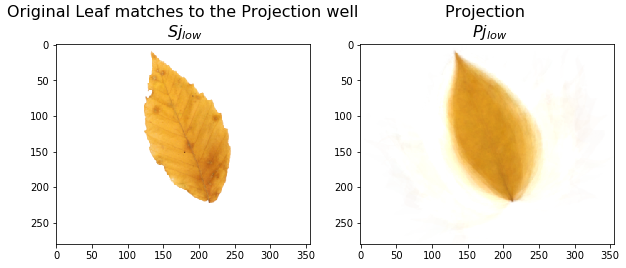

In [41]:
# Find the leaf that is closest to the projection
index_low = np.argmin(dis_S)
S_low_filename = path+file_names[index_low]
print('index = ', index_low, ', distance = ', dis_S[index_low])

S_low_cmy = io.imread(S_low_filename)/255
P_low_rgb, P_low_cmy = projection_left_K(k=8, filename=S_low_filename) # k = 8 specified

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].imshow(S_low_cmy)
axes[0].set_title('Original Leaf matches to the Projection well\n $Sj_{low}$', fontsize=16)

axes[1].imshow(np.clip(P_low_cmy, 0, 1))
axes[1].set_title('Projection \n $Pj_{low}$', fontsize=16)

index =  120 , distance =  0.0756077798566


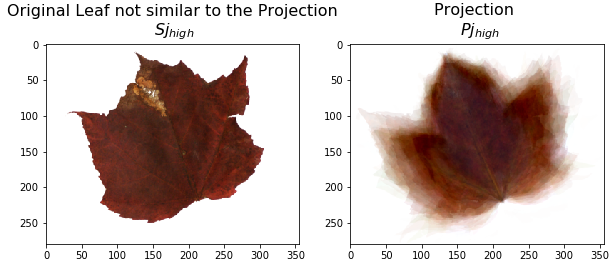

In [42]:
# Find the leaf that is farthest away from the projection
index_high = np.argmax(dis_S)
print('index = ', index_high, ', distance = ', dis_S[index_high])
S_high_filename = path+file_names[index_high]
S_high_cmy = io.imread(S_high_filename)/255
P_high_rgb, P_high_cmy = projection_left_K(k=8, filename=S_high_filename)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].imshow(S_high_cmy)
axes[0].set_title('Original Leaf not similar to the Projection\n $Sj_{high}$ ', fontsize=16)

axes[1].imshow(np.clip(P_high_cmy, 0, 1))
axes[1].set_title('Projection \n $Pj_{high}$', fontsize=16)

### (e)

In [43]:
# List the filenames of extra leaves
path_extra = 'leaves/extra/'
extra_file_names = [f for f in listdir(path_extra)]
L_extra = len(extra_file_names) # 8

dis_R = []

for f_name in extra_file_names:
    R_rgb = 1 - io.imread(path_extra+f_name)/255
    P_R_rgb, P_R_cmy = projection_left_K(k=8, filename=path_extra+f_name)
    
    # Stretch leaf R into a long (3*M*N, 1) array
    R_r = R_rgb[:,:,0].reshape(M*N)
    R_g = R_rgb[:,:,1].reshape(M*N)
    R_b = R_rgb[:,:,2].reshape(M*N)
    R_rgb_long = np.concatenate((R_r,R_g,R_b), axis=0)
    
    # Stretch projected leaf P_R into a long (3*M*N, 1) array
    P_R_r = P_R_rgb[:,:,0].reshape(M*N)
    P_R_g = P_R_rgb[:,:,1].reshape(M*N)
    P_R_b = P_R_rgb[:,:,2].reshape(M*N)
    P_R_rgb_long = np.concatenate((P_R_r,P_R_g,P_R_b), axis=0)
    
    dis_R.append(np.sum(np.square(R_rgb_long-P_R_rgb_long))/(M*N))

for index, d in enumerate(dis_R):
    print('leaf', index, ', dis=', d)

leaf 0 , dis= 0.0190244162532
leaf 1 , dis= 0.027016464828
leaf 2 , dis= 0.0357692655408
leaf 3 , dis= 0.0391542212113
leaf 4 , dis= 0.0244164627802
leaf 5 , dis= 0.0263602089712
leaf 6 , dis= 0.0415619956668
leaf 7 , dis= 0.0533858591972
